<a href="https://colab.research.google.com/github/ritaxtii/imageProcessing/blob/main/lab6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [94]:
!pip install tensorflow==2.14.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 489.8/489.8 MB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 59.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.6/311.6 kB 31.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 75.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 46.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 100.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 98.5 MB/s eta 0:00:00
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 1.12
    Uninstalling flatbuffers-1.12:
      Successfully uninstalled flatbuffers-1.12
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.15.0
    Uninstalling wrapt-1.15.0:
      Successfully uninstalled wrapt-1.15.0
  Attempting uninstall: tensorflow

In [3]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.applications.mobilenet import preprocess_input
from tensorflow.keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator
from keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, UpSampling2D,GlobalAveragePooling2D

In [4]:
#Load base model
base_model=MobileNet(weights='imagenet',include_top=False, input_shape=(224, 224, 3))

In [5]:
# Add new layers
x=base_model.output
x1 = GlobalAveragePooling2D()(x)
x2 = Dense(1024,activation='relu')(x1)
x3 = Dense(1024,activation='relu')(x2)
x4 = Dense(512,activation='relu')(x3)
pred = Dense(3,activation='Softmax')(x4)
model=Model(inputs=base_model.input,outputs=pred)
model.summary()
for layer in model.layers[:86]:
  layer.trainable=False #Freeze base model
for layer in model.layers[86:]:
  layer.trainable=True #Freeze base model

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizati  (None, 112, 112, 32)      128       
 on)                                                             
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D  (None, 112, 112, 32)      288       
 )                                                               
                                                                 
 conv_dw_1_bn (BatchNormali  (None, 112, 112, 32)      128   

In [6]:
for i,layer in enumerate(base_model.layers):
  print(i,layer.name)

0 input_1
1 conv1
2 conv1_bn
3 conv1_relu
4 conv_dw_1
5 conv_dw_1_bn
6 conv_dw_1_relu
7 conv_pw_1
8 conv_pw_1_bn
9 conv_pw_1_relu
10 conv_pad_2
11 conv_dw_2
12 conv_dw_2_bn
13 conv_dw_2_relu
14 conv_pw_2
15 conv_pw_2_bn
16 conv_pw_2_relu
17 conv_dw_3
18 conv_dw_3_bn
19 conv_dw_3_relu
20 conv_pw_3
21 conv_pw_3_bn
22 conv_pw_3_relu
23 conv_pad_4
24 conv_dw_4
25 conv_dw_4_bn
26 conv_dw_4_relu
27 conv_pw_4
28 conv_pw_4_bn
29 conv_pw_4_relu
30 conv_dw_5
31 conv_dw_5_bn
32 conv_dw_5_relu
33 conv_pw_5
34 conv_pw_5_bn
35 conv_pw_5_relu
36 conv_pad_6
37 conv_dw_6
38 conv_dw_6_bn
39 conv_dw_6_relu
40 conv_pw_6
41 conv_pw_6_bn
42 conv_pw_6_relu
43 conv_dw_7
44 conv_dw_7_bn
45 conv_dw_7_relu
46 conv_pw_7
47 conv_pw_7_bn
48 conv_pw_7_relu
49 conv_dw_8
50 conv_dw_8_bn
51 conv_dw_8_relu
52 conv_pw_8
53 conv_pw_8_bn
54 conv_pw_8_relu
55 conv_dw_9
56 conv_dw_9_bn
57 conv_dw_9_relu
58 conv_pw_9
59 conv_pw_9_bn
60 conv_pw_9_relu
61 conv_dw_10
62 conv_dw_10_bn
63 conv_dw_10_relu
64 conv_pw_10
65 conv_pw_1

In [26]:
!unzip "/content/Ship.zip" -d "/content/Ship/"

Archive:  /content/Ship.zip
   creating: /content/Ship/Test/
   creating: /content/Ship/Test/battle ship/
  inflating: /content/Ship/Test/battle ship/t1.jpg  
  inflating: /content/Ship/Test/battle ship/t2.jpg  
 extracting: /content/Ship/Test/battle ship/t3.jpg  
  inflating: /content/Ship/Test/battle ship/t4.jpg  
 extracting: /content/Ship/Test/battle ship/t5.webp  
 extracting: /content/Ship/Test/battle ship/t6.webp  
   creating: /content/Ship/Test/patrol ship/
  inflating: /content/Ship/Test/patrol ship/p1.jpg  
  inflating: /content/Ship/Test/patrol ship/p2.jpg  
  inflating: /content/Ship/Test/patrol ship/p3.jpg  
  inflating: /content/Ship/Test/patrol ship/p4.jpg  
  inflating: /content/Ship/Test/patrol ship/p5.jpg  
 extracting: /content/Ship/Test/patrol ship/p6.jpg  
   creating: /content/Ship/Test/submarine/
  inflating: /content/Ship/Test/submarine/s1.jpg  
  inflating: /content/Ship/Test/submarine/s2.jpg  
  inflating: /content/Ship/Test/submarine/s3.jpg  
  inflating: /c

In [7]:
#Create DataGeneartor Object
datagen=ImageDataGenerator( rotation_range=20,
                                              zoom_range=0.2,
                                              width_shift_range=0.2,
                                              height_shift_range=0.2,
                                              shear_range=0.2,
                                              horizontal_flip=True,
                                              preprocessing_function=preprocess_input,
                                              fill_mode="nearest")

In [8]:
# Create Train Image generator
train_generator=datagen.flow_from_directory('/content/Ship/Train',
                                                                  target_size=(224,224),
                                                                  color_mode='rgb',
                                                                  batch_size = 32,
                                                                  class_mode='categorical',
                                                                  seed = 42,
                                                                  shuffle=True)

Found 97 images belonging to 3 classes.


In [9]:
# Create Validation Image generator
val_generator=datagen.flow_from_directory('/content/Ship/Validate',
                                                                target_size=(224,224),
                                                                color_mode='rgb',
                                                                batch_size=32,
                                                                class_mode='categorical',
                                                                seed = 42,
                                                                shuffle=True)

Found 69 images belonging to 3 classes.


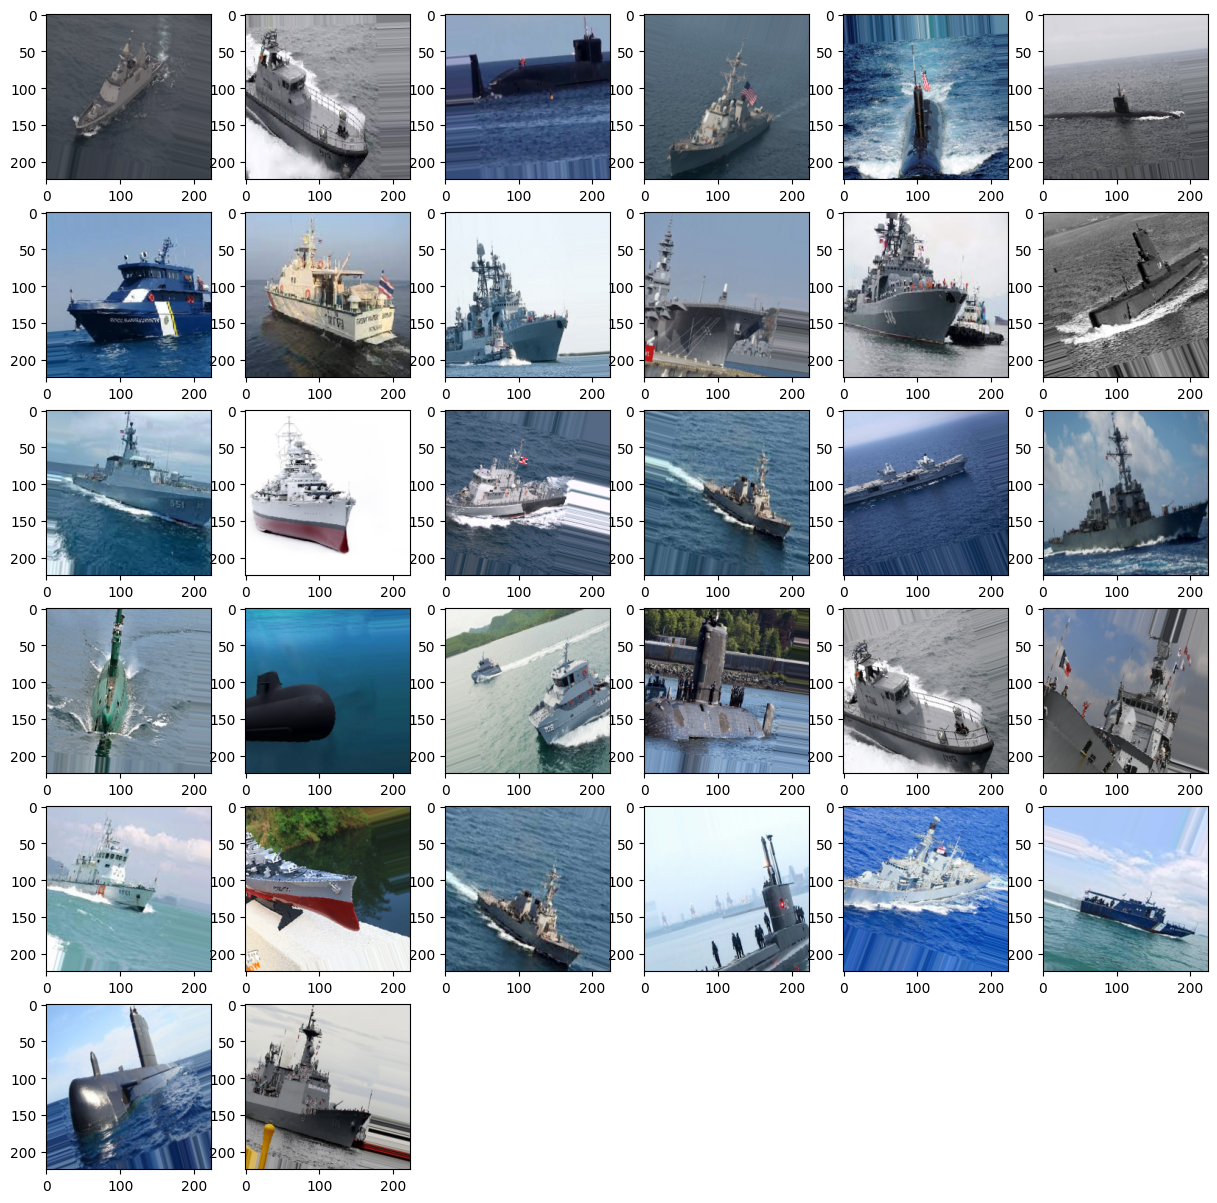

In [10]:
plt.figure(figsize=(15, 15))

batch = train_generator.next()
batch_size = batch[0].shape[0]
for i in range(0,batch_size):
  Img_trian = (batch[0][i]+1)/2 #rescale
  plt.subplot(6, 6, i+1)
  plt.imshow(Img_trian)


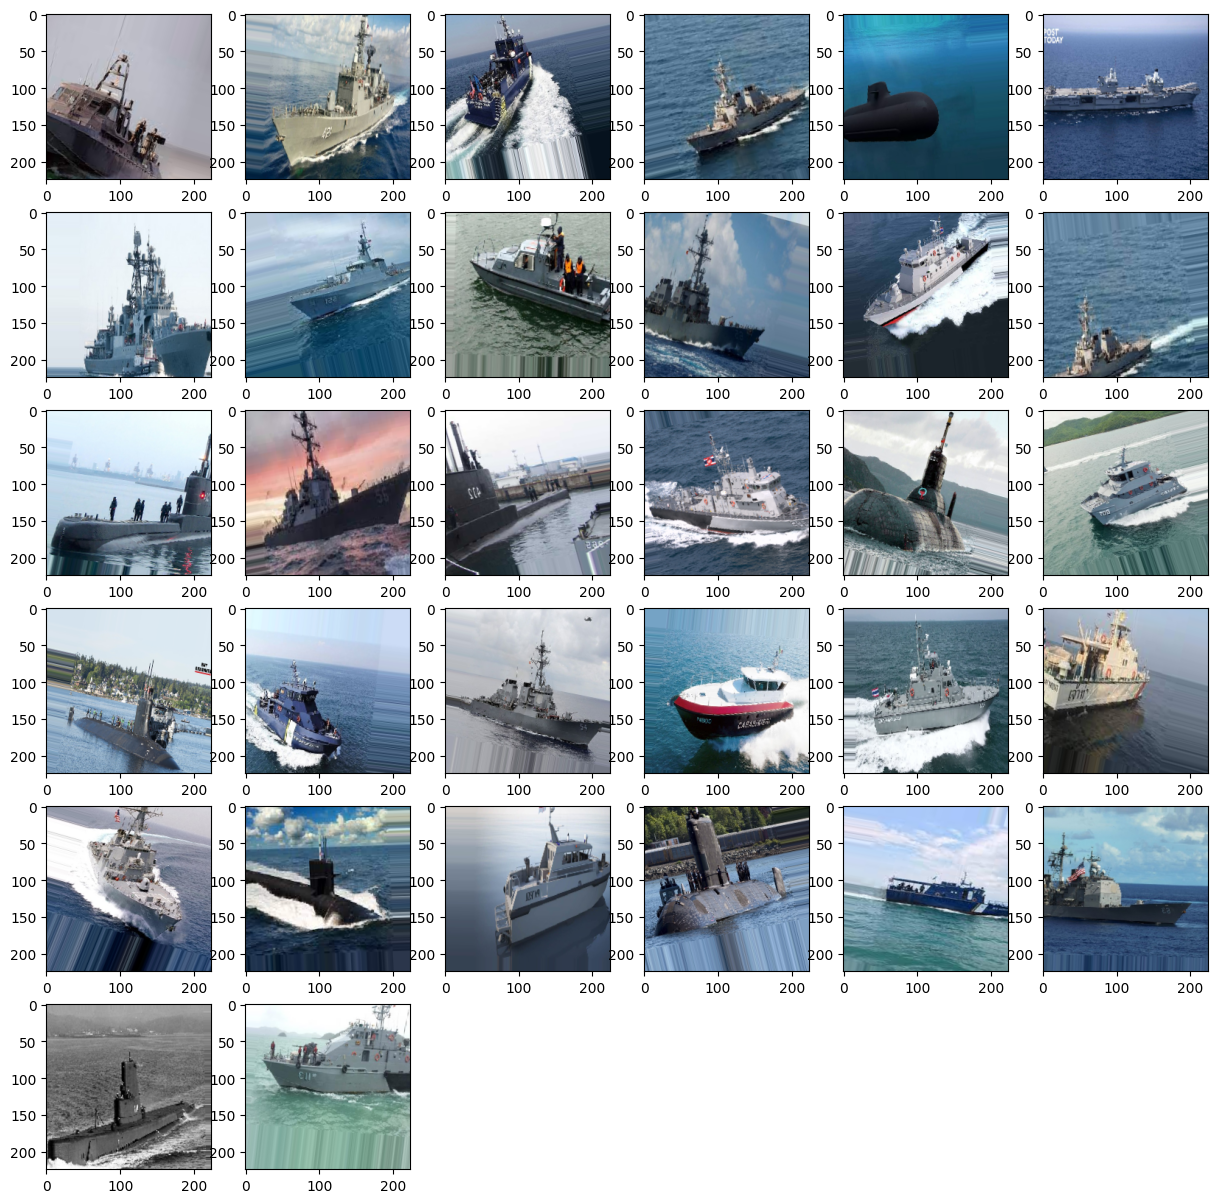

In [11]:
plt.figure(figsize=(15, 15))

batch = val_generator.next()
batch_size = batch[0].shape[0]
for i in range(0,batch_size):
  Img_val = (batch[0][i]+1)/2 #rescale
  plt.subplot(6, 6, i+1)
  plt.imshow(Img_val)

In [13]:
# Create Optimizer
opts = Adam(learning_rate = 0.0001, use_ema=True)
model.compile(loss='categorical_crossentropy',optimizer=opts,metrics=['accuracy'])

In [17]:
# Define training Generator Parameter
EP = 100
step_size_train=train_generator.n//train_generator.batch_size
step_size_val = val_generator.n//val_generator.batch_size
# check step_size_Train = step_size_val -> if not, adjust batch_size to make it equal

In [18]:
history=model.fit_generator(generator=train_generator,
                                        steps_per_epoch=step_size_train,
                                        validation_data = val_generator,
                                        validation_steps = step_size_val,
                                        epochs=EP,
                                        verbose = 1)

<ipython-input-18-053a03c67a17>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history=model.fit_generator(generator=train_generator,


Epoch 1/100
3/3 [==============================] - 15s 2s/step - loss: 1.1389 - accuracy: 0.3231 - val_loss: 0.9365 - val_accuracy: 0.6094
Epoch 2/100
3/3 [==============================] - 2s 1s/step - loss: 1.0185 - accuracy: 0.3846 - val_loss: 0.9063 - val_accuracy: 0.4062
Epoch 3/100
3/3 [==============================] - 3s 1s/step - loss: 0.8431 - accuracy: 0.5625 - val_loss: 0.6505 - val_accuracy: 0.8281
Epoch 4/100
3/3 [==============================] - 3s 1s/step - loss: 0.6734 - accuracy: 0.7812 - val_loss: 0.6026 - val_accuracy: 0.7812
Epoch 5/100
3/3 [==============================] - 4s 2s/step - loss: 0.5692 - accuracy: 0.7692 - val_loss: 0.4959 - val_accuracy: 0.8750
Epoch 6/100
3/3 [==============================] - 4s 2s/step - loss: 0.4911 - accuracy: 0.8308 - val_loss: 0.3976 - val_accuracy: 0.9375
Epoch 7/100
3/3 [==============================] - 4s 2s/step - loss: 0.3461 - accuracy: 0.9385 - val_loss: 0.3934 - val_accuracy: 0.8906
Epoch 8/100
3/3 [================

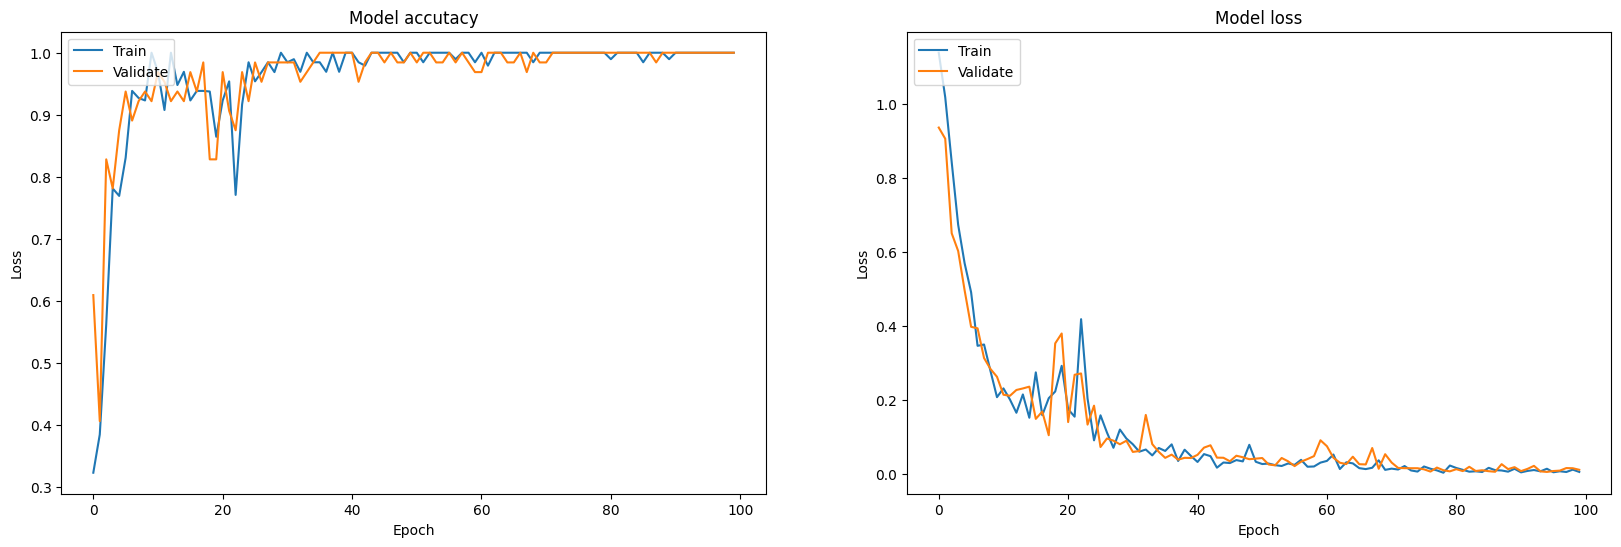

In [37]:
# Performance Visualization
# View Accuracy (Training, Validation)
plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"], label="Train_acc")
plt.plot(history.history["val_accuracy"], label="Validate_acc")
plt.title('Model accutacy')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validate'], loc='upper left')

# View Loss (Training, Validation)
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label="Train_loss")
plt.plot(history.history['val_loss'], label="Validate_loss")
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validate'], loc='upper left')

In [39]:
# Initial test generator
Test_generator = datagen.flow_from_directory(
    '/content/Ship/Test',
    class_mode="categorical",
    target_size=(224, 224), color_mode="rgb",
    shuffle=False,
    batch_size=1)

Found 15 images belonging to 3 classes.


In [41]:
#Get class id for y_real_class
y_true = Test_generator.classes

In [42]:
#predict images according to test_generator # number of real class
preds = model.predict_generator(Test_generator)
print(preds.shape)
print(preds)

<ipython-input-42-ae85343779ce>:2: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  preds = model.predict_generator(Test_generator)


(15, 3)
[[8.84446144e-01 1.14352018e-01 1.20187528e-03]
 [9.30169880e-01 6.84615299e-02 1.36855070e-03]
 [9.80335474e-01 1.89461205e-02 7.18403084e-04]
 [7.29987323e-01 1.28042057e-01 1.41970560e-01]
 [1.36635220e-02 9.80271399e-01 6.06504781e-03]
 [2.78387833e-02 9.68476713e-01 3.68446880e-03]
 [2.35067029e-02 9.61602628e-01 1.48906605e-02]
 [8.51134181e-01 1.40797645e-01 8.06819927e-03]
 [5.20768444e-05 9.99915123e-01 3.27482812e-05]
 [1.90934651e-02 9.06335652e-01 7.45708644e-02]
 [6.47154753e-04 1.44467031e-05 9.99338329e-01]
 [3.20666321e-02 4.98403683e-02 9.18092966e-01]
 [1.50899030e-03 1.26053998e-02 9.85885620e-01]
 [8.27377737e-01 5.15488647e-02 1.21073410e-01]
 [9.49387206e-04 3.63092124e-02 9.62741375e-01]]


In [44]:
y_pred = np.argmax(preds,axis=1)
print(Test_generator.classes)
print(y_pred)

[0 0 0 0 1 1 1 1 1 1 2 2 2 2 2]
[0 0 0 0 1 1 1 0 1 1 2 2 2 0 2]


In [50]:
#Calculate confusion matrix, classification report between y_true and df_class
print(confusion_matrix(y_true, y_pred))
print(classification_report(y_true, y_pred))

[[4 0 0]
 [1 5 0]
 [1 0 4]]
              precision    recall  f1-score   support

           0       0.67      1.00      0.80         4
           1       1.00      0.83      0.91         6
           2       1.00      0.80      0.89         5

    accuracy                           0.87        15
   macro avg       0.89      0.88      0.87        15
weighted avg       0.91      0.87      0.87        15



Found 97 images belonging to 3 classes.
Found 69 images belonging to 3 classes.


<ipython-input-51-c8692b109a4d>:75: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history=model.fit_generator(generator=train_generator,


Epoch 1/100
24/24 [==============================] - 6s 130ms/step - loss: 1.1263 - accuracy: 0.4839 - val_loss: 0.6025 - val_accuracy: 0.8529
Epoch 2/100
24/24 [==============================] - 3s 123ms/step - loss: 0.4342 - accuracy: 0.8495 - val_loss: 0.3082 - val_accuracy: 0.9265
Epoch 3/100
24/24 [==============================] - 4s 151ms/step - loss: 0.2519 - accuracy: 0.9247 - val_loss: 0.1777 - val_accuracy: 0.9559
Epoch 4/100
24/24 [==============================] - 3s 121ms/step - loss: 0.2268 - accuracy: 0.9140 - val_loss: 0.1139 - val_accuracy: 0.9853
Epoch 5/100
24/24 [==============================] - 3s 116ms/step - loss: 0.1473 - accuracy: 0.9570 - val_loss: 0.2023 - val_accuracy: 0.9559
Epoch 6/100
24/24 [==============================] - 3s 127ms/step - loss: 0.1311 - accuracy: 0.9462 - val_loss: 0.1050 - val_accuracy: 0.9559
Epoch 7/100
24/24 [==============================] - 5s 195ms/step - loss: 0.0838 - accuracy: 0.9892 - val_loss: 0.0877 - val_accuracy: 0.9706

<ipython-input-51-c8692b109a4d>:114: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  preds = model.predict_generator(Test_generator)


(15, 3)
[[9.96399403e-01 1.62881252e-03 1.97180128e-03]
 [9.99740660e-01 2.33862920e-05 2.35930434e-04]
 [9.97986436e-01 1.93191750e-03 8.15966341e-05]
 [9.98862863e-01 1.41517434e-04 9.95672308e-04]
 [9.88962478e-04 9.98985350e-01 2.57713673e-05]
 [3.92501606e-05 9.99597132e-01 3.63651372e-04]
 [8.33503378e-04 9.86335516e-01 1.28309866e-02]
 [5.20834350e-04 9.99333680e-01 1.45419093e-04]
 [2.38566315e-07 9.99994755e-01 5.03998626e-06]
 [4.76406376e-06 9.99927759e-01 6.74502007e-05]
 [3.05045191e-02 3.48491994e-07 9.69495118e-01]
 [4.59728464e-02 3.03182878e-05 9.53996897e-01]
 [1.13428505e-02 5.11821592e-03 9.83538985e-01]
 [1.43521987e-02 6.86566927e-05 9.85579133e-01]
 [8.78878126e-09 2.27115402e-06 9.99997735e-01]]
[0 0 0 0 1 1 1 1 1 1 2 2 2 2 2]
[0 0 0 0 1 1 1 1 1 1 2 2 2 2 2]
[[4 0 0]
 [0 6 0]
 [0 0 5]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         6
           2    

<Figure size 1500x1500 with 0 Axes>

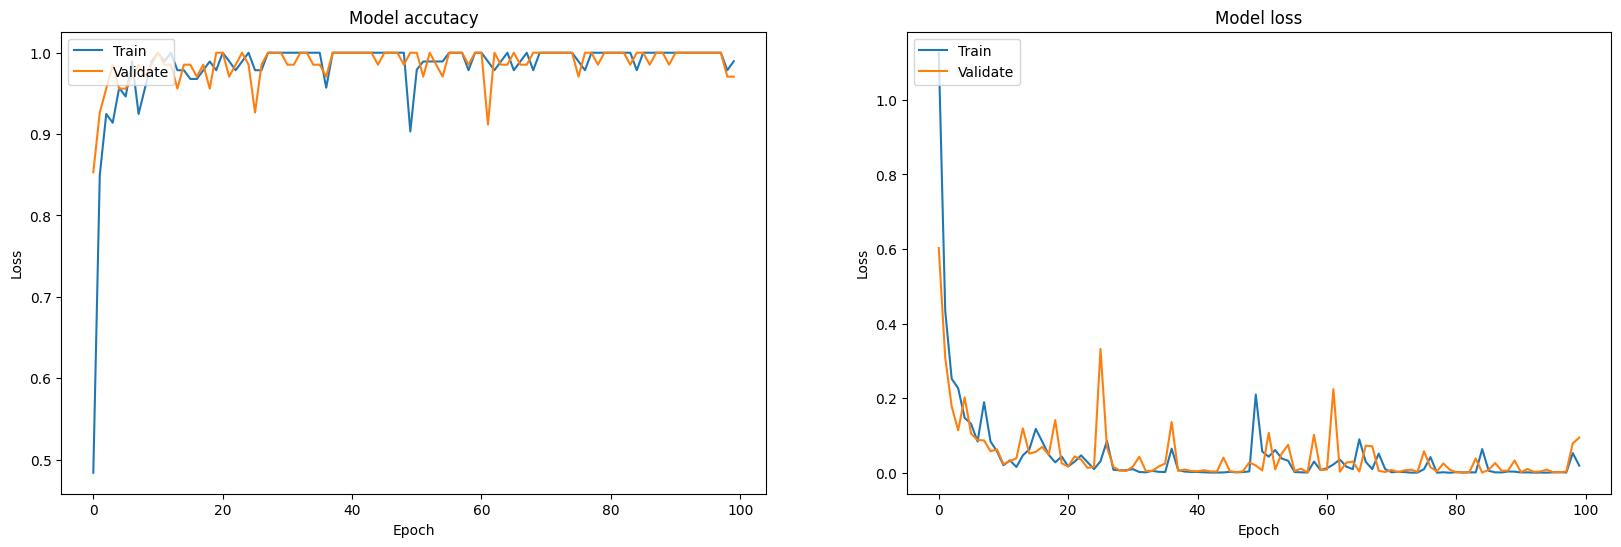

In [51]:
#Load base model
base_model=MobileNet(weights='imagenet',include_top=False, input_shape=(224, 224, 3))

# Add new layers
x=base_model.output
x1 = GlobalAveragePooling2D()(x)
x2 = Dense(1024,activation='relu')(x1)
x3 = Dense(1024,activation='relu')(x2)
x4 = Dense(512,activation='relu')(x3)
pred = Dense(3,activation='Softmax')(x4)
model=Model(inputs=base_model.input,outputs=pred)
#model.summary()
for layer in model.layers[:86]:
  layer.trainable=False #Freeze base model
for layer in model.layers[86:]:
  layer.trainable=True #Freeze base model

# for i,layer in enumerate(base_model.layers):
#   print(i,layer.name)

#Create DataGeneartor Object
datagen=ImageDataGenerator( rotation_range=20,
                                              zoom_range=0.2,
                                              width_shift_range=0.2,
                                              height_shift_range=0.2,
                                              shear_range=0.2,
                                              horizontal_flip=True,
                                              preprocessing_function=preprocess_input,
                                              fill_mode="nearest")

# Create Train Image generator
train_generator=datagen.flow_from_directory('/content/Ship/Train',
                                                                  target_size=(224,224),
                                                                  color_mode='rgb',
                                                                  batch_size = 4,
                                                                  class_mode='categorical',
                                                                  seed = 42,
                                                                  shuffle=True)

# Create Validation Image generator
val_generator=datagen.flow_from_directory('/content/Ship/Validate',
                                                                target_size=(224,224),
                                                                color_mode='rgb',
                                                                batch_size=4,
                                                                class_mode='categorical',
                                                                seed = 42,
                                                                shuffle=True)

plt.figure(figsize=(15, 15))

batch = train_generator.next()
batch_size = batch[0].shape[0]
# for i in range(0,batch_size):
#   Img_trian = (batch[0][i]+1)/2 #rescale
#   plt.subplot(6, 6, i+1)
#   plt.imshow(Img_trian)
# plt.figure(figsize=(15, 15))
# batch = val_generator.next()
# batch_size = batch[0].shape[0]
# for i in range(0,batch_size):
#   Img_val = (batch[0][i]+1)/2 #rescale
#   plt.subplot(6, 6, i+1)
#   plt.imshow(Img_val)

# Create Optimizer
opts = Adam(learning_rate = 0.0001, use_ema=True)
model.compile(loss='categorical_crossentropy',optimizer=opts,metrics=['accuracy'])

# Define training Generator Parameter
EP = 100
step_size_train=train_generator.n//train_generator.batch_size
step_size_val = val_generator.n//val_generator.batch_size
# check step_size_Train = step_size_val -> if not, adjust batch_size to make it equal

history=model.fit_generator(generator=train_generator,
                                        steps_per_epoch=step_size_train,
                                        validation_data = val_generator,
                                        validation_steps = step_size_val,
                                        epochs=EP,
                                        verbose = 1)

# Performance Visualization
# View Accuracy (Training, Validation)
plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"], label="Train_acc")
plt.plot(history.history["val_accuracy"], label="Validate_acc")
plt.title('Model accutacy')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validate'], loc='upper left')

# View Loss (Training, Validation)
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label="Train_loss")
plt.plot(history.history['val_loss'], label="Validate_loss")
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validate'], loc='upper left')


# Initial test generator
Test_generator = datagen.flow_from_directory(
    '/content/Ship/Test',
    class_mode="categorical",
    target_size=(224, 224), color_mode="rgb",
    shuffle=False,
    batch_size=1)

#Get class id for y_real_class
y_true = Test_generator.classes
#predict images according to test_generator # number of real class
preds = model.predict_generator(Test_generator)
print(preds.shape)
print(preds)
y_pred = np.argmax(preds,axis=1)
print(Test_generator.classes)
print(y_pred)
#Calculate confusion matrix, classification report between y_true and df_class
print(confusion_matrix(y_true, y_pred))
print(classification_report(y_true, y_pred))

Found 97 images belonging to 3 classes.
Found 69 images belonging to 3 classes.


<ipython-input-52-edadde7b8216>:75: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history=model.fit_generator(generator=train_generator,


Epoch 1/200
3/3 [==============================] - 6s 2s/step - loss: 1.3746 - accuracy: 0.3692 - val_loss: 0.9829 - val_accuracy: 0.4375
Epoch 2/200
3/3 [==============================] - 3s 1s/step - loss: 0.9493 - accuracy: 0.5417 - val_loss: 0.9062 - val_accuracy: 0.6094
Epoch 3/200
3/3 [==============================] - 7s 3s/step - loss: 0.8236 - accuracy: 0.6462 - val_loss: 0.7298 - val_accuracy: 0.7031
Epoch 4/200
3/3 [==============================] - 4s 2s/step - loss: 0.6009 - accuracy: 0.7846 - val_loss: 0.5749 - val_accuracy: 0.8750
Epoch 5/200
3/3 [==============================] - 2s 939ms/step - loss: 0.5728 - accuracy: 0.8615 - val_loss: 0.4935 - val_accuracy: 0.9062
Epoch 6/200
3/3 [==============================] - 4s 2s/step - loss: 0.3973 - accuracy: 0.9692 - val_loss: 0.3987 - val_accuracy: 0.9062
Epoch 7/200
3/3 [==============================] - 4s 2s/step - loss: 0.4293 - accuracy: 0.9231 - val_loss: 0.3536 - val_accuracy: 0.9375
Epoch 8/200
3/3 [==============

<ipython-input-52-edadde7b8216>:114: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  preds = model.predict_generator(Test_generator)


(15, 3)
[[9.9947578e-01 5.1810395e-04 6.2440781e-06]
 [9.9958247e-01 4.0657117e-04 1.0942385e-05]
 [9.9890387e-01 1.0639844e-03 3.2205164e-05]
 [9.7712427e-01 1.4784165e-03 2.1397365e-02]
 [2.7295833e-02 9.7265357e-01 5.0538813e-05]
 [1.7566043e-04 9.9923217e-01 5.9210695e-04]
 [2.0201553e-03 8.2563388e-01 1.7234597e-01]
 [7.1846950e-03 9.9260956e-01 2.0574369e-04]
 [2.0000759e-06 9.9998903e-01 8.8956758e-06]
 [8.6350636e-05 9.9989831e-01 1.5342112e-05]
 [9.3266908e-03 9.8643067e-09 9.9067324e-01]
 [4.1892659e-03 2.7987175e-05 9.9578273e-01]
 [3.1139804e-03 1.1468915e-04 9.9677128e-01]
 [8.9455223e-01 1.0703518e-04 1.0534073e-01]
 [1.7956417e-06 9.3430608e-05 9.9990475e-01]]
[0 0 0 0 1 1 1 1 1 1 2 2 2 2 2]
[0 0 0 0 1 1 1 1 1 1 2 2 2 0 2]
[[4 0 0]
 [0 6 0]
 [1 0 4]]
              precision    recall  f1-score   support

           0       0.80      1.00      0.89         4
           1       1.00      1.00      1.00         6
           2       1.00      0.80      0.89         5

    ac

<Figure size 1500x1500 with 0 Axes>

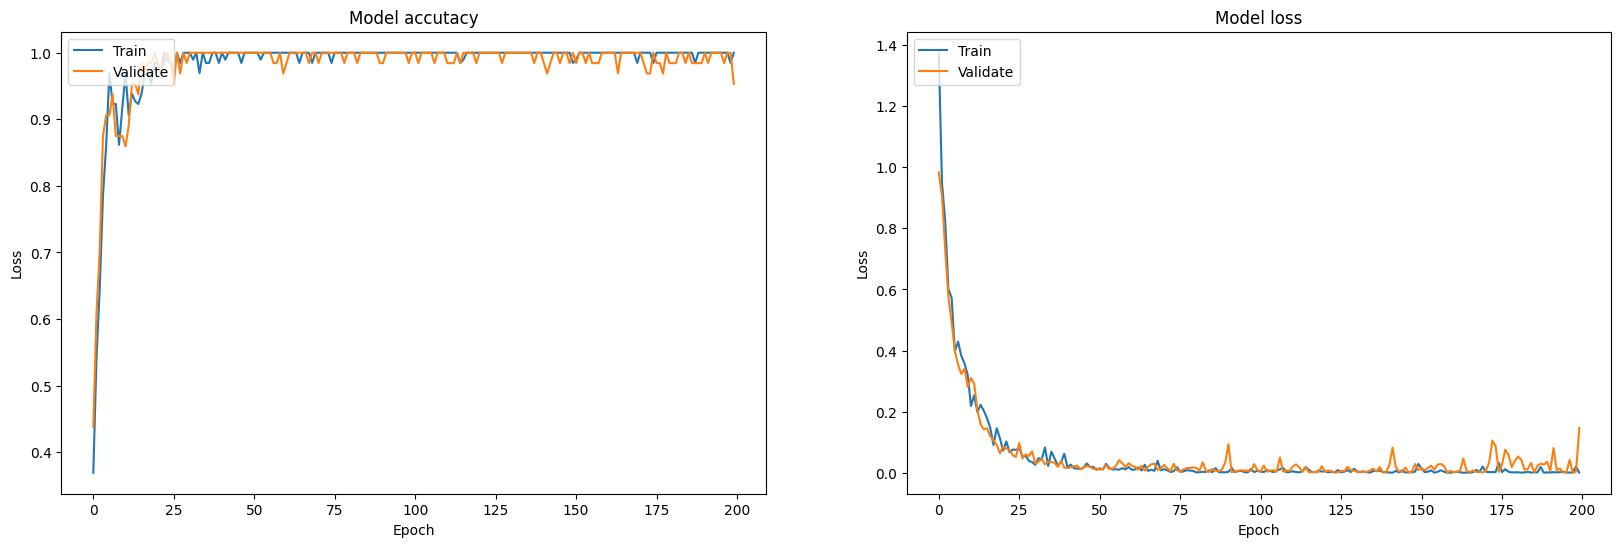

In [52]:
#Load base model
base_model=MobileNet(weights='imagenet',include_top=False, input_shape=(224, 224, 3))

# Add new layers
x=base_model.output
x1 = GlobalAveragePooling2D()(x)
x2 = Dense(1024,activation='relu')(x1)
x3 = Dense(1024,activation='relu')(x2)
x4 = Dense(512,activation='relu')(x3)
pred = Dense(3,activation='Softmax')(x4)
model=Model(inputs=base_model.input,outputs=pred)
#model.summary()
for layer in model.layers[:86]:
  layer.trainable=False #Freeze base model
for layer in model.layers[86:]:
  layer.trainable=True #Freeze base model

# for i,layer in enumerate(base_model.layers):
#   print(i,layer.name)

#Create DataGeneartor Object
datagen=ImageDataGenerator( rotation_range=20,
                                              zoom_range=0.2,
                                              width_shift_range=0.2,
                                              height_shift_range=0.2,
                                              shear_range=0.2,
                                              horizontal_flip=True,
                                              preprocessing_function=preprocess_input,
                                              fill_mode="nearest")

# Create Train Image generator
train_generator=datagen.flow_from_directory('/content/Ship/Train',
                                                                  target_size=(224,224),
                                                                  color_mode='rgb',
                                                                  batch_size = 32,
                                                                  class_mode='categorical',
                                                                  seed = 42,
                                                                  shuffle=True)

# Create Validation Image generator
val_generator=datagen.flow_from_directory('/content/Ship/Validate',
                                                                target_size=(224,224),
                                                                color_mode='rgb',
                                                                batch_size=32,
                                                                class_mode='categorical',
                                                                seed = 42,
                                                                shuffle=True)

plt.figure(figsize=(15, 15))

batch = train_generator.next()
batch_size = batch[0].shape[0]
# for i in range(0,batch_size):
#   Img_trian = (batch[0][i]+1)/2 #rescale
#   plt.subplot(6, 6, i+1)
#   plt.imshow(Img_trian)
# plt.figure(figsize=(15, 15))
# batch = val_generator.next()
# batch_size = batch[0].shape[0]
# for i in range(0,batch_size):
#   Img_val = (batch[0][i]+1)/2 #rescale
#   plt.subplot(6, 6, i+1)
#   plt.imshow(Img_val)

# Create Optimizer
opts = Adam(learning_rate = 0.0001, use_ema=True)
model.compile(loss='categorical_crossentropy',optimizer=opts,metrics=['accuracy'])

# Define training Generator Parameter
EP = 200
step_size_train=train_generator.n//train_generator.batch_size
step_size_val = val_generator.n//val_generator.batch_size
# check step_size_Train = step_size_val -> if not, adjust batch_size to make it equal

history=model.fit_generator(generator=train_generator,
                                        steps_per_epoch=step_size_train,
                                        validation_data = val_generator,
                                        validation_steps = step_size_val,
                                        epochs=EP,
                                        verbose = 1)

# Performance Visualization
# View Accuracy (Training, Validation)
plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"], label="Train_acc")
plt.plot(history.history["val_accuracy"], label="Validate_acc")
plt.title('Model accutacy')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validate'], loc='upper left')

# View Loss (Training, Validation)
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label="Train_loss")
plt.plot(history.history['val_loss'], label="Validate_loss")
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validate'], loc='upper left')


# Initial test generator
Test_generator = datagen.flow_from_directory(
    '/content/Ship/Test',
    class_mode="categorical",
    target_size=(224, 224), color_mode="rgb",
    shuffle=False,
    batch_size=1)

#Get class id for y_real_class
y_true = Test_generator.classes
#predict images according to test_generator # number of real class
preds = model.predict_generator(Test_generator)
print(preds.shape)
print(preds)
y_pred = np.argmax(preds,axis=1)
print(Test_generator.classes)
print(y_pred)
#Calculate confusion matrix, classification report between y_true and df_class
print(confusion_matrix(y_true, y_pred))
print(classification_report(y_true, y_pred))

Found 97 images belonging to 3 classes.
Found 69 images belonging to 3 classes.


<ipython-input-55-07950aa26079>:75: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history=model.fit_generator(generator=train_generator,


Epoch 1/50
3/3 [==============================] - 6s 1s/step - loss: 1.1985 - accuracy: 0.3231 - val_loss: 0.9225 - val_accuracy: 0.6094
Epoch 2/50
3/3 [==============================] - 5s 2s/step - loss: 0.8978 - accuracy: 0.6146 - val_loss: 0.7674 - val_accuracy: 0.7344
Epoch 3/50
3/3 [==============================] - 4s 2s/step - loss: 0.7097 - accuracy: 0.6308 - val_loss: 0.6778 - val_accuracy: 0.7969
Epoch 4/50
3/3 [==============================] - 2s 960ms/step - loss: 0.6208 - accuracy: 0.8000 - val_loss: 0.5635 - val_accuracy: 0.8750
Epoch 5/50
3/3 [==============================] - 3s 1s/step - loss: 0.5004 - accuracy: 0.8854 - val_loss: 0.5159 - val_accuracy: 0.8281
Epoch 6/50
3/3 [==============================] - 4s 2s/step - loss: 0.4409 - accuracy: 0.8854 - val_loss: 0.4201 - val_accuracy: 0.9062
Epoch 7/50
3/3 [==============================] - 4s 2s/step - loss: 0.3684 - accuracy: 0.8769 - val_loss: 0.3720 - val_accuracy: 0.9062
Epoch 8/50
3/3 [======================

<ipython-input-55-07950aa26079>:114: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  preds = model.predict_generator(Test_generator)


(15, 3)
[[0.8290839  0.11970882 0.05120727]
 [0.7860513  0.1807824  0.03316628]
 [0.5165626  0.45827731 0.02516009]
 [0.5649027  0.27847782 0.15661943]
 [0.05035924 0.94417876 0.0054621 ]
 [0.11216976 0.8059819  0.08184836]
 [0.12024144 0.8452599  0.03449872]
 [0.29909632 0.6875586  0.01334511]
 [0.02388758 0.9520019  0.02411043]
 [0.01005648 0.97481096 0.01513249]
 [0.18473804 0.00712583 0.8081361 ]
 [0.14337097 0.09832072 0.7583083 ]
 [0.02639896 0.02354247 0.9500586 ]
 [0.17139736 0.07815247 0.75045013]
 [0.02216026 0.3597436  0.6180961 ]]
[0 0 0 0 1 1 1 1 1 1 2 2 2 2 2]
[0 0 0 0 1 1 1 1 1 1 2 2 2 2 2]
[[4 0 0]
 [0 6 0]
 [0 0 5]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         5

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00

<Figure size 1500x1500 with 0 Axes>

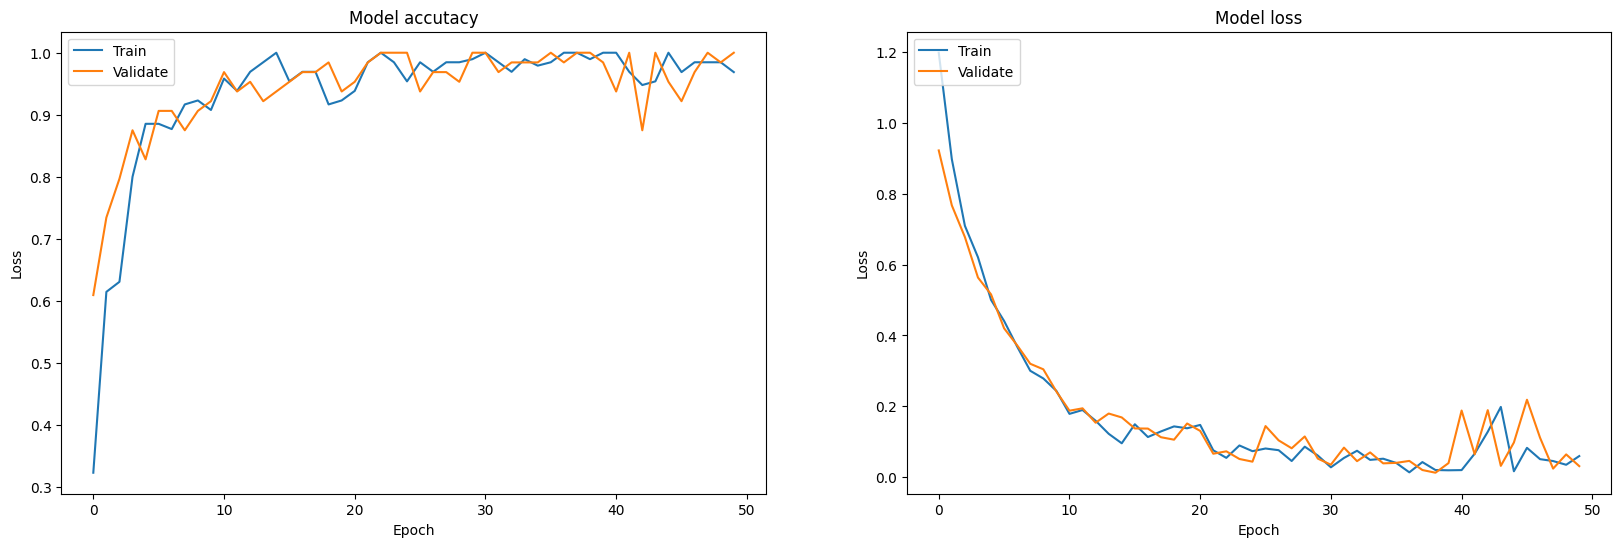

In [55]:
#Load base model
base_model=MobileNet(weights='imagenet',include_top=False, input_shape=(224, 224, 3))

# Add new layers
x=base_model.output
x1 = GlobalAveragePooling2D()(x)
x2 = Dense(1024,activation='relu')(x1)
x3 = Dense(1024,activation='relu')(x2)
x4 = Dense(512,activation='relu')(x3)
pred = Dense(3,activation='Softmax')(x4)
model=Model(inputs=base_model.input,outputs=pred)
#model.summary()
for layer in model.layers[:86]:
  layer.trainable=False #Freeze base model
for layer in model.layers[86:]:
  layer.trainable=True #Freeze base model

# for i,layer in enumerate(base_model.layers):
#   print(i,layer.name)

#Create DataGeneartor Object
datagen=ImageDataGenerator( rotation_range=20,
                                              zoom_range=0.2,
                                              width_shift_range=0.2,
                                              height_shift_range=0.2,
                                              shear_range=0.2,
                                              horizontal_flip=True,
                                              preprocessing_function=preprocess_input,
                                              fill_mode="nearest")

# Create Train Image generator
train_generator=datagen.flow_from_directory('/content/Ship/Train',
                                                                  target_size=(224,224),
                                                                  color_mode='rgb',
                                                                  batch_size = 32,
                                                                  class_mode='categorical',
                                                                  seed = 42,
                                                                  shuffle=True)

# Create Validation Image generator
val_generator=datagen.flow_from_directory('/content/Ship/Validate',
                                                                target_size=(224,224),
                                                                color_mode='rgb',
                                                                batch_size=32,
                                                                class_mode='categorical',
                                                                seed = 42,
                                                                shuffle=True)

plt.figure(figsize=(15, 15))

batch = train_generator.next()
batch_size = batch[0].shape[0]
# for i in range(0,batch_size):
#   Img_trian = (batch[0][i]+1)/2 #rescale
#   plt.subplot(6, 6, i+1)
#   plt.imshow(Img_trian)
# plt.figure(figsize=(15, 15))
# batch = val_generator.next()
# batch_size = batch[0].shape[0]
# for i in range(0,batch_size):
#   Img_val = (batch[0][i]+1)/2 #rescale
#   plt.subplot(6, 6, i+1)
#   plt.imshow(Img_val)

# Create Optimizer
opts = Adam(learning_rate = 0.0001, use_ema=True)
model.compile(loss='categorical_crossentropy',optimizer=opts,metrics=['accuracy'])

# Define training Generator Parameter
EP = 50
step_size_train=train_generator.n//train_generator.batch_size
step_size_val = val_generator.n//val_generator.batch_size
# check step_size_Train = step_size_val -> if not, adjust batch_size to make it equal

history=model.fit_generator(generator=train_generator,
                                        steps_per_epoch=step_size_train,
                                        validation_data = val_generator,
                                        validation_steps = step_size_val,
                                        epochs=EP,
                                        verbose = 1)

# Performance Visualization
# View Accuracy (Training, Validation)
plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"], label="Train_acc")
plt.plot(history.history["val_accuracy"], label="Validate_acc")
plt.title('Model accutacy')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validate'], loc='upper left')

# View Loss (Training, Validation)
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label="Train_loss")
plt.plot(history.history['val_loss'], label="Validate_loss")
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validate'], loc='upper left')


# Initial test generator
Test_generator = datagen.flow_from_directory(
    '/content/Ship/Test',
    class_mode="categorical",
    target_size=(224, 224), color_mode="rgb",
    shuffle=False,
    batch_size=1)

#Get class id for y_real_class
y_true = Test_generator.classes
#predict images according to test_generator # number of real class
preds = model.predict_generator(Test_generator)
print(preds.shape)
print(preds)
y_pred = np.argmax(preds,axis=1)
print(Test_generator.classes)
print(y_pred)
#Calculate confusion matrix, classification report between y_true and df_class
print(confusion_matrix(y_true, y_pred))
print(classification_report(y_true, y_pred))

Found 97 images belonging to 3 classes.
Found 69 images belonging to 3 classes.


<ipython-input-53-6ccbd200c0d5>:75: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history=model.fit_generator(generator=train_generator,


Epoch 1/100
3/3 [==============================] - 7s 1s/step - loss: 1.1389 - accuracy: 0.2923 - val_loss: 0.8888 - val_accuracy: 0.5938
Epoch 2/100
3/3 [==============================] - 4s 2s/step - loss: 0.9188 - accuracy: 0.5417 - val_loss: 0.8379 - val_accuracy: 0.6094
Epoch 3/100
3/3 [==============================] - 3s 1s/step - loss: 0.7402 - accuracy: 0.6771 - val_loss: 0.6482 - val_accuracy: 0.8594
Epoch 4/100
3/3 [==============================] - 2s 903ms/step - loss: 0.5814 - accuracy: 0.8462 - val_loss: 0.5909 - val_accuracy: 0.7500
Epoch 5/100
3/3 [==============================] - 4s 2s/step - loss: 0.5718 - accuracy: 0.7846 - val_loss: 0.6625 - val_accuracy: 0.6875
Epoch 6/100
3/3 [==============================] - 5s 2s/step - loss: 0.4836 - accuracy: 0.7692 - val_loss: 0.5872 - val_accuracy: 0.7031
Epoch 7/100
3/3 [==============================] - 6s 2s/step - loss: 0.4562 - accuracy: 0.8308 - val_loss: 0.4408 - val_accuracy: 0.8281
Epoch 8/100
3/3 [==============

<ipython-input-53-6ccbd200c0d5>:114: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  preds = model.predict_generator(Test_generator)


(15, 3)
[[9.3890023e-01 6.0893539e-02 2.0619658e-04]
 [9.3860465e-01 6.0258716e-02 1.1366934e-03]
 [9.8546833e-01 1.4228165e-02 3.0356296e-04]
 [5.4199058e-01 1.8910772e-01 2.6890165e-01]
 [3.6475241e-01 6.3284820e-01 2.3993065e-03]
 [1.8901085e-03 9.2983359e-01 6.8276323e-02]
 [4.9617742e-03 9.8525083e-01 9.7874487e-03]
 [2.3572687e-03 9.9456775e-01 3.0749917e-03]
 [8.2209026e-03 9.6635246e-01 2.5426608e-02]
 [3.5048067e-03 9.6276498e-01 3.3730090e-02]
 [3.2255597e-02 1.0910897e-04 9.6763527e-01]
 [3.3955421e-02 1.2076834e-03 9.6483684e-01]
 [5.7419229e-02 8.0174943e-03 9.3456328e-01]
 [4.3008697e-01 4.7870047e-02 5.2204299e-01]
 [5.2631953e-05 2.9345991e-03 9.9701273e-01]]
[0 0 0 0 1 1 1 1 1 1 2 2 2 2 2]
[0 0 0 0 1 1 1 1 1 1 2 2 2 2 2]
[[4 0 0]
 [0 6 0]
 [0 0 5]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         5

    ac

<Figure size 1500x1500 with 0 Axes>

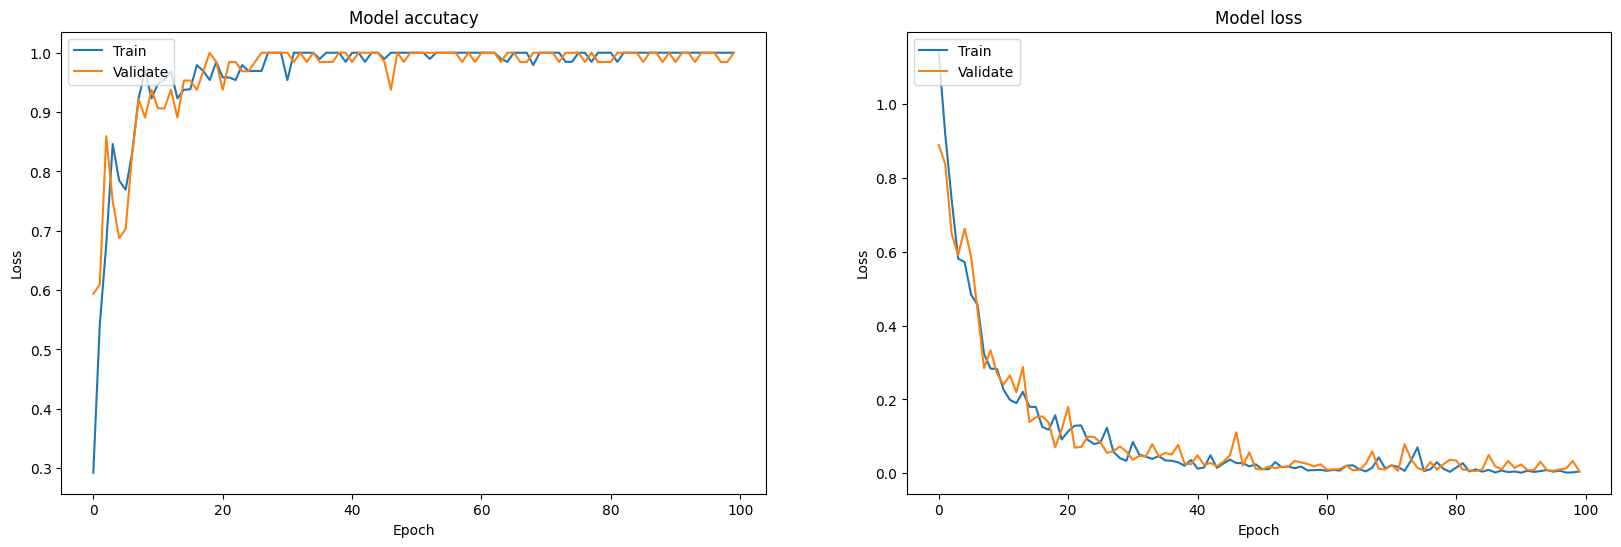

In [53]:
#Load base model
base_model=MobileNet(weights='imagenet',include_top=False, input_shape=(224, 224, 3))

# Add new layers
x=base_model.output
x1 = GlobalAveragePooling2D()(x)
x2 = Dense(1024,activation='relu')(x1)
x3 = Dense(512,activation='relu')(x2)
x4 = Dense(256,activation='relu')(x3)
pred = Dense(3,activation='Softmax')(x4)
model=Model(inputs=base_model.input,outputs=pred)
#model.summary()
for layer in model.layers[:86]:
  layer.trainable=False #Freeze base model
for layer in model.layers[86:]:
  layer.trainable=True #Freeze base model

# for i,layer in enumerate(base_model.layers):
#   print(i,layer.name)

#Create DataGeneartor Object
datagen=ImageDataGenerator( rotation_range=20,
                                              zoom_range=0.2,
                                              width_shift_range=0.2,
                                              height_shift_range=0.2,
                                              shear_range=0.2,
                                              horizontal_flip=True,
                                              preprocessing_function=preprocess_input,
                                              fill_mode="nearest")

# Create Train Image generator
train_generator=datagen.flow_from_directory('/content/Ship/Train',
                                                                  target_size=(224,224),
                                                                  color_mode='rgb',
                                                                  batch_size = 32,
                                                                  class_mode='categorical',
                                                                  seed = 42,
                                                                  shuffle=True)

# Create Validation Image generator
val_generator=datagen.flow_from_directory('/content/Ship/Validate',
                                                                target_size=(224,224),
                                                                color_mode='rgb',
                                                                batch_size=32,
                                                                class_mode='categorical',
                                                                seed = 42,
                                                                shuffle=True)

plt.figure(figsize=(15, 15))

batch = train_generator.next()
batch_size = batch[0].shape[0]
# for i in range(0,batch_size):
#   Img_trian = (batch[0][i]+1)/2 #rescale
#   plt.subplot(6, 6, i+1)
#   plt.imshow(Img_trian)
# plt.figure(figsize=(15, 15))
# batch = val_generator.next()
# batch_size = batch[0].shape[0]
# for i in range(0,batch_size):
#   Img_val = (batch[0][i]+1)/2 #rescale
#   plt.subplot(6, 6, i+1)
#   plt.imshow(Img_val)

# Create Optimizer
opts = Adam(learning_rate = 0.0001, use_ema=True)
model.compile(loss='categorical_crossentropy',optimizer=opts,metrics=['accuracy'])

# Define training Generator Parameter
EP = 100
step_size_train=train_generator.n//train_generator.batch_size
step_size_val = val_generator.n//val_generator.batch_size
# check step_size_Train = step_size_val -> if not, adjust batch_size to make it equal

history=model.fit_generator(generator=train_generator,
                                        steps_per_epoch=step_size_train,
                                        validation_data = val_generator,
                                        validation_steps = step_size_val,
                                        epochs=EP,
                                        verbose = 1)

# Performance Visualization
# View Accuracy (Training, Validation)
plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"], label="Train_acc")
plt.plot(history.history["val_accuracy"], label="Validate_acc")
plt.title('Model accutacy')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validate'], loc='upper left')

# View Loss (Training, Validation)
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label="Train_loss")
plt.plot(history.history['val_loss'], label="Validate_loss")
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validate'], loc='upper left')


# Initial test generator
Test_generator = datagen.flow_from_directory(
    '/content/Ship/Test',
    class_mode="categorical",
    target_size=(224, 224), color_mode="rgb",
    shuffle=False,
    batch_size=1)

#Get class id for y_real_class
y_true = Test_generator.classes
#predict images according to test_generator # number of real class
preds = model.predict_generator(Test_generator)
print(preds.shape)
print(preds)
y_pred = np.argmax(preds,axis=1)
print(Test_generator.classes)
print(y_pred)
#Calculate confusion matrix, classification report between y_true and df_class
print(confusion_matrix(y_true, y_pred))
print(classification_report(y_true, y_pred))

Found 97 images belonging to 3 classes.
Found 69 images belonging to 3 classes.


<ipython-input-54-c1688f98e960>:75: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history=model.fit_generator(generator=train_generator,


Epoch 1/100
3/3 [==============================] - 13s 1s/step - loss: 1.0708 - accuracy: 0.4062 - val_loss: 0.8997 - val_accuracy: 0.6250
Epoch 2/100
3/3 [==============================] - 4s 2s/step - loss: 0.8024 - accuracy: 0.7846 - val_loss: 0.7944 - val_accuracy: 0.6250
Epoch 3/100
3/3 [==============================] - 3s 1s/step - loss: 0.6461 - accuracy: 0.8646 - val_loss: 0.7839 - val_accuracy: 0.6094
Epoch 4/100
3/3 [==============================] - 4s 2s/step - loss: 0.4521 - accuracy: 0.9231 - val_loss: 0.8859 - val_accuracy: 0.5000
Epoch 5/100
3/3 [==============================] - 3s 1s/step - loss: 0.4342 - accuracy: 0.8615 - val_loss: 0.8326 - val_accuracy: 0.5312
Epoch 6/100
3/3 [==============================] - 2s 922ms/step - loss: 0.3280 - accuracy: 0.9385 - val_loss: 0.4996 - val_accuracy: 0.7500
Epoch 7/100
3/3 [==============================] - 3s 1s/step - loss: 0.2939 - accuracy: 0.9231 - val_loss: 0.3354 - val_accuracy: 0.9219
Epoch 8/100
3/3 [=============

<ipython-input-54-c1688f98e960>:114: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  preds = model.predict_generator(Test_generator)


(15, 3)
[[9.8241675e-01 5.1307413e-03 1.2452509e-02]
 [9.8333699e-01 1.0800946e-02 5.8620963e-03]
 [8.7069970e-01 1.0845825e-01 2.0842083e-02]
 [6.1611992e-01 2.7031559e-01 1.1356446e-01]
 [1.8702497e-01 7.6769114e-01 4.5283899e-02]
 [2.9025122e-03 9.8471123e-01 1.2386314e-02]
 [3.1055581e-02 8.9351070e-01 7.5433806e-02]
 [1.6748580e-01 7.4005634e-01 9.2457868e-02]
 [5.5971101e-02 8.6473864e-01 7.9290316e-02]
 [6.4922854e-02 6.1929423e-01 3.1578287e-01]
 [2.0749886e-02 7.5065187e-04 9.7849941e-01]
 [3.2367054e-01 5.3028531e-02 6.2330091e-01]
 [1.3280118e-01 2.9783813e-02 8.3741498e-01]
 [3.3555326e-01 6.8189122e-02 5.9625763e-01]
 [6.2609278e-04 8.5487915e-04 9.9851900e-01]]
[0 0 0 0 1 1 1 1 1 1 2 2 2 2 2]
[0 0 0 0 1 1 1 1 1 1 2 2 2 2 2]
[[4 0 0]
 [0 6 0]
 [0 0 5]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         5

    ac

<Figure size 1500x1500 with 0 Axes>

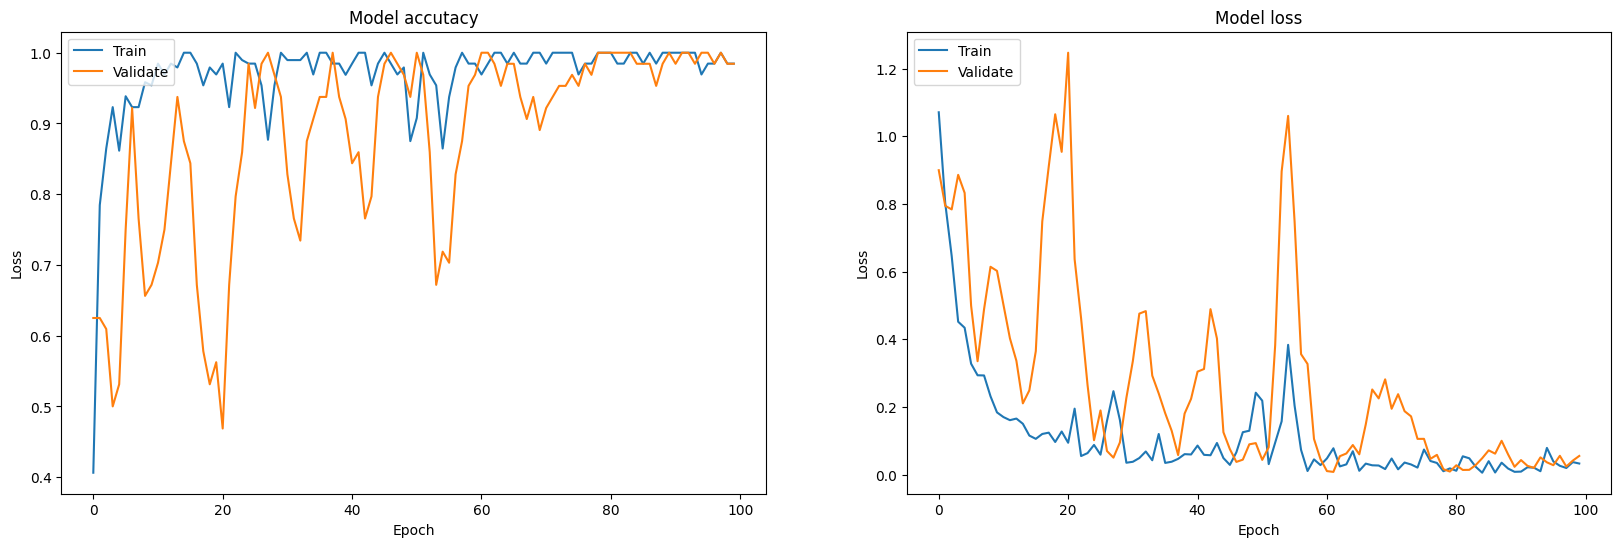

In [54]:
#Load base model
base_model=MobileNet(weights='imagenet',include_top=False, input_shape=(224, 224, 3))

# Add new layers
x=base_model.output
x1 = GlobalAveragePooling2D()(x)
x2 = Dense(1024,activation='relu')(x1)
x3 = Dense(1024,activation='relu')(x2)
x4 = Dense(512,activation='relu')(x3)
pred = Dense(3,activation='Softmax')(x4)
model=Model(inputs=base_model.input,outputs=pred)
#model.summary()
for layer in model.layers[:50]:
  layer.trainable=False #Freeze base model
for layer in model.layers[50:]:
  layer.trainable=True #Freeze base model

# for i,layer in enumerate(base_model.layers):
#   print(i,layer.name)

#Create DataGeneartor Object
datagen=ImageDataGenerator( rotation_range=20,
                                              zoom_range=0.2,
                                              width_shift_range=0.2,
                                              height_shift_range=0.2,
                                              shear_range=0.2,
                                              horizontal_flip=True,
                                              preprocessing_function=preprocess_input,
                                              fill_mode="nearest")

# Create Train Image generator
train_generator=datagen.flow_from_directory('/content/Ship/Train',
                                                                  target_size=(224,224),
                                                                  color_mode='rgb',
                                                                  batch_size = 32,
                                                                  class_mode='categorical',
                                                                  seed = 42,
                                                                  shuffle=True)

# Create Validation Image generator
val_generator=datagen.flow_from_directory('/content/Ship/Validate',
                                                                target_size=(224,224),
                                                                color_mode='rgb',
                                                                batch_size=32,
                                                                class_mode='categorical',
                                                                seed = 42,
                                                                shuffle=True)

plt.figure(figsize=(15, 15))

batch = train_generator.next()
batch_size = batch[0].shape[0]
# for i in range(0,batch_size):
#   Img_trian = (batch[0][i]+1)/2 #rescale
#   plt.subplot(6, 6, i+1)
#   plt.imshow(Img_trian)
# plt.figure(figsize=(15, 15))
# batch = val_generator.next()
# batch_size = batch[0].shape[0]
# for i in range(0,batch_size):
#   Img_val = (batch[0][i]+1)/2 #rescale
#   plt.subplot(6, 6, i+1)
#   plt.imshow(Img_val)

# Create Optimizer
opts = Adam(learning_rate = 0.0001, use_ema=True)
model.compile(loss='categorical_crossentropy',optimizer=opts,metrics=['accuracy'])

# Define training Generator Parameter
EP = 100
step_size_train=train_generator.n//train_generator.batch_size
step_size_val = val_generator.n//val_generator.batch_size
# check step_size_Train = step_size_val -> if not, adjust batch_size to make it equal

history=model.fit_generator(generator=train_generator,
                                        steps_per_epoch=step_size_train,
                                        validation_data = val_generator,
                                        validation_steps = step_size_val,
                                        epochs=EP,
                                        verbose = 1)

# Performance Visualization
# View Accuracy (Training, Validation)
plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"], label="Train_acc")
plt.plot(history.history["val_accuracy"], label="Validate_acc")
plt.title('Model accutacy')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validate'], loc='upper left')

# View Loss (Training, Validation)
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label="Train_loss")
plt.plot(history.history['val_loss'], label="Validate_loss")
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validate'], loc='upper left')


# Initial test generator
Test_generator = datagen.flow_from_directory(
    '/content/Ship/Test',
    class_mode="categorical",
    target_size=(224, 224), color_mode="rgb",
    shuffle=False,
    batch_size=1)

#Get class id for y_real_class
y_true = Test_generator.classes
#predict images according to test_generator # number of real class
preds = model.predict_generator(Test_generator)
print(preds.shape)
print(preds)
y_pred = np.argmax(preds,axis=1)
print(Test_generator.classes)
print(y_pred)
#Calculate confusion matrix, classification report between y_true and df_class
print(confusion_matrix(y_true, y_pred))
print(classification_report(y_true, y_pred))

Found 97 images belonging to 3 classes.
Found 69 images belonging to 3 classes.


<ipython-input-56-3c2c26e848f5>:75: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history=model.fit_generator(generator=train_generator,


Epoch 1/100
3/3 [==============================] - 10s 1s/step - loss: 1.0616 - accuracy: 0.4688 - val_loss: 0.9098 - val_accuracy: 0.4219
Epoch 2/100
3/3 [==============================] - 4s 2s/step - loss: 0.7652 - accuracy: 0.7692 - val_loss: 0.8734 - val_accuracy: 0.5312
Epoch 3/100
3/3 [==============================] - 3s 1s/step - loss: 0.6852 - accuracy: 0.7846 - val_loss: 0.7672 - val_accuracy: 0.5469
Epoch 4/100
3/3 [==============================] - 4s 2s/step - loss: 0.5402 - accuracy: 0.9385 - val_loss: 0.9286 - val_accuracy: 0.5000
Epoch 5/100
3/3 [==============================] - 3s 1s/step - loss: 0.5040 - accuracy: 0.8750 - val_loss: 1.0286 - val_accuracy: 0.4844
Epoch 6/100
3/3 [==============================] - 4s 2s/step - loss: 0.5370 - accuracy: 0.8769 - val_loss: 0.8109 - val_accuracy: 0.5781
Epoch 7/100
3/3 [==============================] - 4s 2s/step - loss: 0.3694 - accuracy: 0.8923 - val_loss: 0.6491 - val_accuracy: 0.6562
Epoch 8/100
3/3 [================

<ipython-input-56-3c2c26e848f5>:114: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  preds = model.predict_generator(Test_generator)


(15, 3)
[[8.8071346e-01 1.0911111e-01 1.0175469e-02]
 [9.4699728e-01 4.4273902e-02 8.7288404e-03]
 [6.7897826e-01 2.8043124e-01 4.0590569e-02]
 [3.4547907e-01 5.7589960e-01 7.8621365e-02]
 [3.2262120e-01 6.5615374e-01 2.1225017e-02]
 [9.5882677e-03 9.7743690e-01 1.2974807e-02]
 [8.2506046e-02 8.8129783e-01 3.6196165e-02]
 [7.8619733e-02 8.9640766e-01 2.4972614e-02]
 [1.6925652e-02 9.7156233e-01 1.1512056e-02]
 [4.4696815e-02 9.1313124e-01 4.2171914e-02]
 [8.7839514e-03 5.0190493e-04 9.9071407e-01]
 [1.9236973e-01 2.7256783e-02 7.8037351e-01]
 [1.9258043e-01 4.0671945e-02 7.6674759e-01]
 [8.1622934e-01 4.1834682e-02 1.4193599e-01]
 [1.0004091e-02 3.2538660e-02 9.5745718e-01]]
[0 0 0 0 1 1 1 1 1 1 2 2 2 2 2]
[0 0 0 1 1 1 1 1 1 1 2 2 2 0 2]
[[3 1 0]
 [0 6 0]
 [1 0 4]]
              precision    recall  f1-score   support

           0       0.75      0.75      0.75         4
           1       0.86      1.00      0.92         6
           2       1.00      0.80      0.89         5

    ac

<Figure size 1500x1500 with 0 Axes>

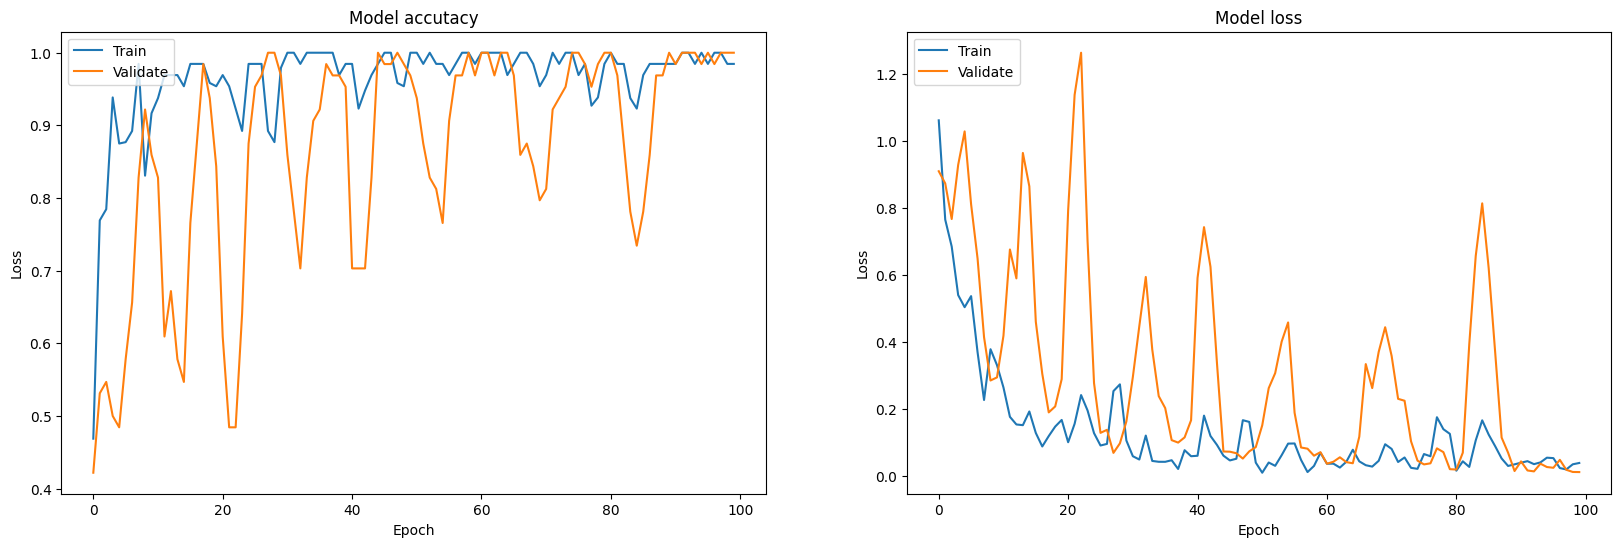

In [56]:
#Load base model
base_model=MobileNet(weights='imagenet',include_top=False, input_shape=(224, 224, 3))

# Add new layers
x=base_model.output
x1 = GlobalAveragePooling2D()(x)
x2 = Dense(1024,activation='relu')(x1)
x3 = Dense(1024,activation='relu')(x2)
x4 = Dense(512,activation='relu')(x3)
pred = Dense(3,activation='Softmax')(x4)
model=Model(inputs=base_model.input,outputs=pred)
#model.summary()
for layer in model.layers[:65]:
  layer.trainable=False #Freeze base model
for layer in model.layers[65:]:
  layer.trainable=True #Freeze base model

# for i,layer in enumerate(base_model.layers):
#   print(i,layer.name)

#Create DataGeneartor Object
datagen=ImageDataGenerator( rotation_range=20,
                                              zoom_range=0.2,
                                              width_shift_range=0.2,
                                              height_shift_range=0.2,
                                              shear_range=0.2,
                                              horizontal_flip=True,
                                              preprocessing_function=preprocess_input,
                                              fill_mode="nearest")

# Create Train Image generator
train_generator=datagen.flow_from_directory('/content/Ship/Train',
                                                                  target_size=(224,224),
                                                                  color_mode='rgb',
                                                                  batch_size = 32,
                                                                  class_mode='categorical',
                                                                  seed = 42,
                                                                  shuffle=True)

# Create Validation Image generator
val_generator=datagen.flow_from_directory('/content/Ship/Validate',
                                                                target_size=(224,224),
                                                                color_mode='rgb',
                                                                batch_size=32,
                                                                class_mode='categorical',
                                                                seed = 42,
                                                                shuffle=True)

plt.figure(figsize=(15, 15))

batch = train_generator.next()
batch_size = batch[0].shape[0]
# for i in range(0,batch_size):
#   Img_trian = (batch[0][i]+1)/2 #rescale
#   plt.subplot(6, 6, i+1)
#   plt.imshow(Img_trian)
# plt.figure(figsize=(15, 15))
# batch = val_generator.next()
# batch_size = batch[0].shape[0]
# for i in range(0,batch_size):
#   Img_val = (batch[0][i]+1)/2 #rescale
#   plt.subplot(6, 6, i+1)
#   plt.imshow(Img_val)

# Create Optimizer
opts = Adam(learning_rate = 0.0001, use_ema=True)
model.compile(loss='categorical_crossentropy',optimizer=opts,metrics=['accuracy'])

# Define training Generator Parameter
EP = 100
step_size_train=train_generator.n//train_generator.batch_size
step_size_val = val_generator.n//val_generator.batch_size
# check step_size_Train = step_size_val -> if not, adjust batch_size to make it equal

history=model.fit_generator(generator=train_generator,
                                        steps_per_epoch=step_size_train,
                                        validation_data = val_generator,
                                        validation_steps = step_size_val,
                                        epochs=EP,
                                        verbose = 1)

# Performance Visualization
# View Accuracy (Training, Validation)
plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"], label="Train_acc")
plt.plot(history.history["val_accuracy"], label="Validate_acc")
plt.title('Model accutacy')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validate'], loc='upper left')

# View Loss (Training, Validation)
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label="Train_loss")
plt.plot(history.history['val_loss'], label="Validate_loss")
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validate'], loc='upper left')


# Initial test generator
Test_generator = datagen.flow_from_directory(
    '/content/Ship/Test',
    class_mode="categorical",
    target_size=(224, 224), color_mode="rgb",
    shuffle=False,
    batch_size=1)

#Get class id for y_real_class
y_true = Test_generator.classes
#predict images according to test_generator # number of real class
preds = model.predict_generator(Test_generator)
print(preds.shape)
print(preds)
y_pred = np.argmax(preds,axis=1)
print(Test_generator.classes)
print(y_pred)
#Calculate confusion matrix, classification report between y_true and df_class
print(confusion_matrix(y_true, y_pred))
print(classification_report(y_true, y_pred))

Found 97 images belonging to 3 classes.
Found 69 images belonging to 3 classes.


<ipython-input-57-9b07a02983d3>:75: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history=model.fit_generator(generator=train_generator,


Epoch 1/100
3/3 [==============================] - 8s 3s/step - loss: 1.1601 - accuracy: 0.3958 - val_loss: 1.0764 - val_accuracy: 0.4219
Epoch 2/100
3/3 [==============================] - 4s 2s/step - loss: 1.1177 - accuracy: 0.2923 - val_loss: 1.1193 - val_accuracy: 0.3438
Epoch 3/100
3/3 [==============================] - 3s 1s/step - loss: 1.1255 - accuracy: 0.3231 - val_loss: 1.0941 - val_accuracy: 0.3906
Epoch 4/100
3/3 [==============================] - 3s 1s/step - loss: 1.1456 - accuracy: 0.3438 - val_loss: 1.0726 - val_accuracy: 0.4688
Epoch 5/100
3/3 [==============================] - 5s 2s/step - loss: 1.1606 - accuracy: 0.3538 - val_loss: 1.0475 - val_accuracy: 0.5156
Epoch 6/100
3/3 [==============================] - 3s 931ms/step - loss: 1.1939 - accuracy: 0.3538 - val_loss: 1.0645 - val_accuracy: 0.4844
Epoch 7/100
3/3 [==============================] - 3s 1s/step - loss: 1.1038 - accuracy: 0.3958 - val_loss: 1.0895 - val_accuracy: 0.4844
Epoch 8/100
3/3 [==============

<ipython-input-57-9b07a02983d3>:114: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  preds = model.predict_generator(Test_generator)


(15, 3)
[[0.39936632 0.3620539  0.23857975]
 [0.42266557 0.29285622 0.28447816]
 [0.24485426 0.4384829  0.3166628 ]
 [0.251191   0.21527213 0.5335369 ]
 [0.3959889  0.29987648 0.30413458]
 [0.40163752 0.31747165 0.2808908 ]
 [0.3802032  0.3396793  0.28011745]
 [0.43726504 0.3602862  0.20244877]
 [0.34675774 0.34253097 0.31071126]
 [0.23606446 0.36561984 0.39831573]
 [0.28091258 0.23044154 0.48864585]
 [0.26745313 0.24945429 0.48309264]
 [0.23087063 0.39052814 0.37860125]
 [0.35622957 0.29940376 0.34436667]
 [0.31364524 0.40922484 0.2771299 ]]
[0 0 0 0 1 1 1 1 1 1 2 2 2 2 2]
[0 0 1 2 0 0 0 0 0 2 2 2 1 0 1]
[[2 1 1]
 [5 0 1]
 [1 2 2]]
              precision    recall  f1-score   support

           0       0.25      0.50      0.33         4
           1       0.00      0.00      0.00         6
           2       0.50      0.40      0.44         5

    accuracy                           0.27        15
   macro avg       0.25      0.30      0.26        15
weighted avg       0.23      0.27

<Figure size 1500x1500 with 0 Axes>

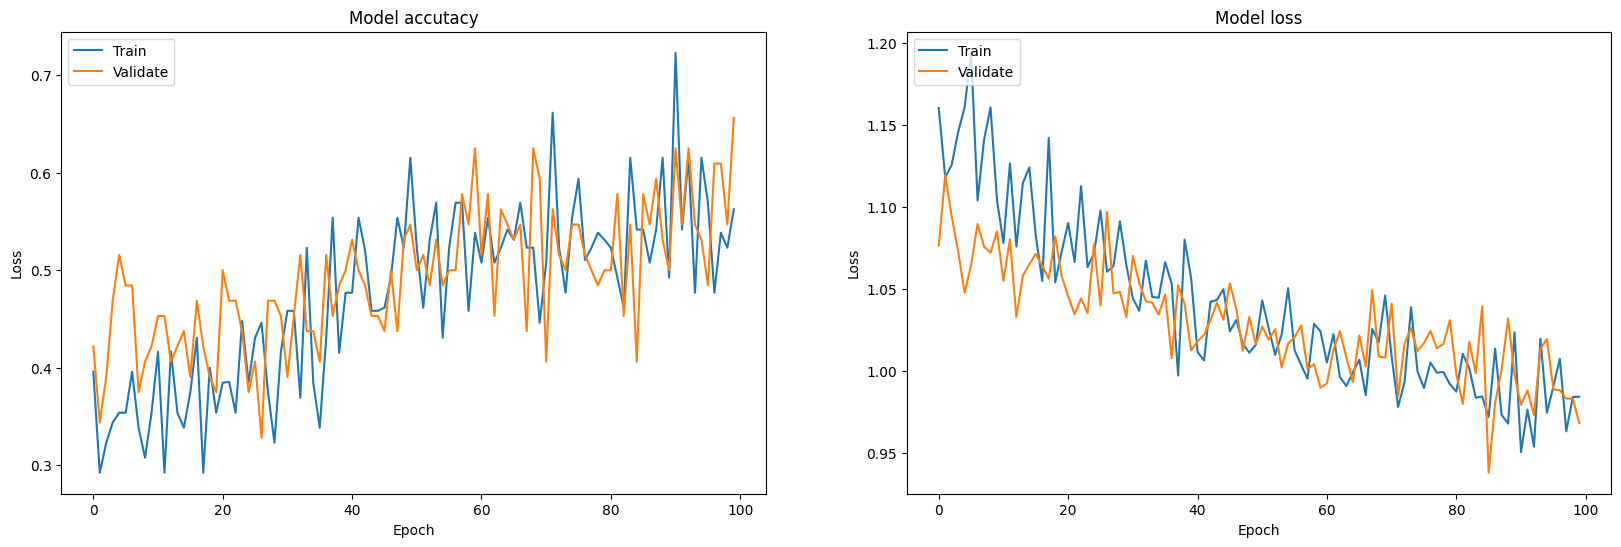

In [57]:
#Load base model
base_model=MobileNet(weights='imagenet',include_top=False, input_shape=(224, 224, 3))

# Add new layers
x=base_model.output
x1 = GlobalAveragePooling2D()(x)
x2 = Dense(1024,activation='relu')(x1)
x3 = Dense(1024,activation='relu')(x2)
x4 = Dense(512,activation='relu')(x3)
pred = Dense(3,activation='Softmax')(x4)
model=Model(inputs=base_model.input,outputs=pred)
#model.summary()
for layer in model.layers[:90]:
  layer.trainable=False #Freeze base model
for layer in model.layers[90:]:
  layer.trainable=True #Freeze base model

# for i,layer in enumerate(base_model.layers):
#   print(i,layer.name)

#Create DataGeneartor Object
datagen=ImageDataGenerator( rotation_range=20,
                                              zoom_range=0.2,
                                              width_shift_range=0.2,
                                              height_shift_range=0.2,
                                              shear_range=0.2,
                                              horizontal_flip=True,
                                              preprocessing_function=preprocess_input,
                                              fill_mode="nearest")

# Create Train Image generator
train_generator=datagen.flow_from_directory('/content/Ship/Train',
                                                                  target_size=(224,224),
                                                                  color_mode='rgb',
                                                                  batch_size = 32,
                                                                  class_mode='categorical',
                                                                  seed = 42,
                                                                  shuffle=True)

# Create Validation Image generator
val_generator=datagen.flow_from_directory('/content/Ship/Validate',
                                                                target_size=(224,224),
                                                                color_mode='rgb',
                                                                batch_size=32,
                                                                class_mode='categorical',
                                                                seed = 42,
                                                                shuffle=True)

plt.figure(figsize=(15, 15))

batch = train_generator.next()
batch_size = batch[0].shape[0]
# for i in range(0,batch_size):
#   Img_trian = (batch[0][i]+1)/2 #rescale
#   plt.subplot(6, 6, i+1)
#   plt.imshow(Img_trian)
# plt.figure(figsize=(15, 15))
# batch = val_generator.next()
# batch_size = batch[0].shape[0]
# for i in range(0,batch_size):
#   Img_val = (batch[0][i]+1)/2 #rescale
#   plt.subplot(6, 6, i+1)
#   plt.imshow(Img_val)

# Create Optimizer
opts = Adam(learning_rate = 0.0001, use_ema=True)
model.compile(loss='categorical_crossentropy',optimizer=opts,metrics=['accuracy'])

# Define training Generator Parameter
EP = 100
step_size_train=train_generator.n//train_generator.batch_size
step_size_val = val_generator.n//val_generator.batch_size
# check step_size_Train = step_size_val -> if not, adjust batch_size to make it equal

history=model.fit_generator(generator=train_generator,
                                        steps_per_epoch=step_size_train,
                                        validation_data = val_generator,
                                        validation_steps = step_size_val,
                                        epochs=EP,
                                        verbose = 1)

# Performance Visualization
# View Accuracy (Training, Validation)
plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"], label="Train_acc")
plt.plot(history.history["val_accuracy"], label="Validate_acc")
plt.title('Model accutacy')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validate'], loc='upper left')

# View Loss (Training, Validation)
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label="Train_loss")
plt.plot(history.history['val_loss'], label="Validate_loss")
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validate'], loc='upper left')


# Initial test generator
Test_generator = datagen.flow_from_directory(
    '/content/Ship/Test',
    class_mode="categorical",
    target_size=(224, 224), color_mode="rgb",
    shuffle=False,
    batch_size=1)

#Get class id for y_real_class
y_true = Test_generator.classes
#predict images according to test_generator # number of real class
preds = model.predict_generator(Test_generator)
print(preds.shape)
print(preds)
y_pred = np.argmax(preds,axis=1)
print(Test_generator.classes)
print(y_pred)
#Calculate confusion matrix, classification report between y_true and df_class
print(confusion_matrix(y_true, y_pred))
print(classification_report(y_true, y_pred))

Found 97 images belonging to 3 classes.
Found 69 images belonging to 3 classes.


<ipython-input-58-18f27bba595d>:75: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history=model.fit_generator(generator=train_generator,


Epoch 1/100
3/3 [==============================] - 18s 1s/step - loss: 1.0296 - accuracy: 0.4462 - val_loss: 0.8425 - val_accuracy: 0.5000
Epoch 2/100
3/3 [==============================] - 3s 935ms/step - loss: 0.9403 - accuracy: 0.5231 - val_loss: 0.7326 - val_accuracy: 0.7031
Epoch 3/100
3/3 [==============================] - 7s 3s/step - loss: 0.7851 - accuracy: 0.6771 - val_loss: 0.6992 - val_accuracy: 0.7344
Epoch 4/100
3/3 [==============================] - 3s 1s/step - loss: 0.6533 - accuracy: 0.7604 - val_loss: 0.7303 - val_accuracy: 0.6094
Epoch 5/100
3/3 [==============================] - 3s 914ms/step - loss: 0.5045 - accuracy: 0.8154 - val_loss: 0.6973 - val_accuracy: 0.6094
Epoch 6/100
3/3 [==============================] - 4s 2s/step - loss: 0.4007 - accuracy: 0.9167 - val_loss: 0.4616 - val_accuracy: 0.7969
Epoch 7/100
3/3 [==============================] - 4s 2s/step - loss: 0.3202 - accuracy: 0.9538 - val_loss: 0.4843 - val_accuracy: 0.7812
Epoch 8/100
3/3 [==========

<ipython-input-58-18f27bba595d>:114: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  preds = model.predict_generator(Test_generator)


(15, 3)
[[0.95428795 0.04048194 0.0052301 ]
 [0.8920718  0.08648136 0.02144674]
 [0.9565681  0.03386639 0.00956543]
 [0.52995336 0.42255974 0.04748692]
 [0.4231181  0.5569441  0.01993779]
 [0.01988968 0.91264546 0.0674648 ]
 [0.02797088 0.7980257  0.17400335]
 [0.25676247 0.70680594 0.03643168]
 [0.08407411 0.82065916 0.09526679]
 [0.1813436  0.7388137  0.07984271]
 [0.01643917 0.00121203 0.98234874]
 [0.38174927 0.07852316 0.53972757]
 [0.20223255 0.09137118 0.7063962 ]
 [0.56878024 0.16826847 0.26295125]
 [0.00295203 0.00160267 0.9954454 ]]
[0 0 0 0 1 1 1 1 1 1 2 2 2 2 2]
[0 0 0 0 1 1 1 1 1 1 2 2 2 0 2]
[[4 0 0]
 [0 6 0]
 [1 0 4]]
              precision    recall  f1-score   support

           0       0.80      1.00      0.89         4
           1       1.00      1.00      1.00         6
           2       1.00      0.80      0.89         5

    accuracy                           0.93        15
   macro avg       0.93      0.93      0.93        15
weighted avg       0.95      0.93

<Figure size 1500x1500 with 0 Axes>

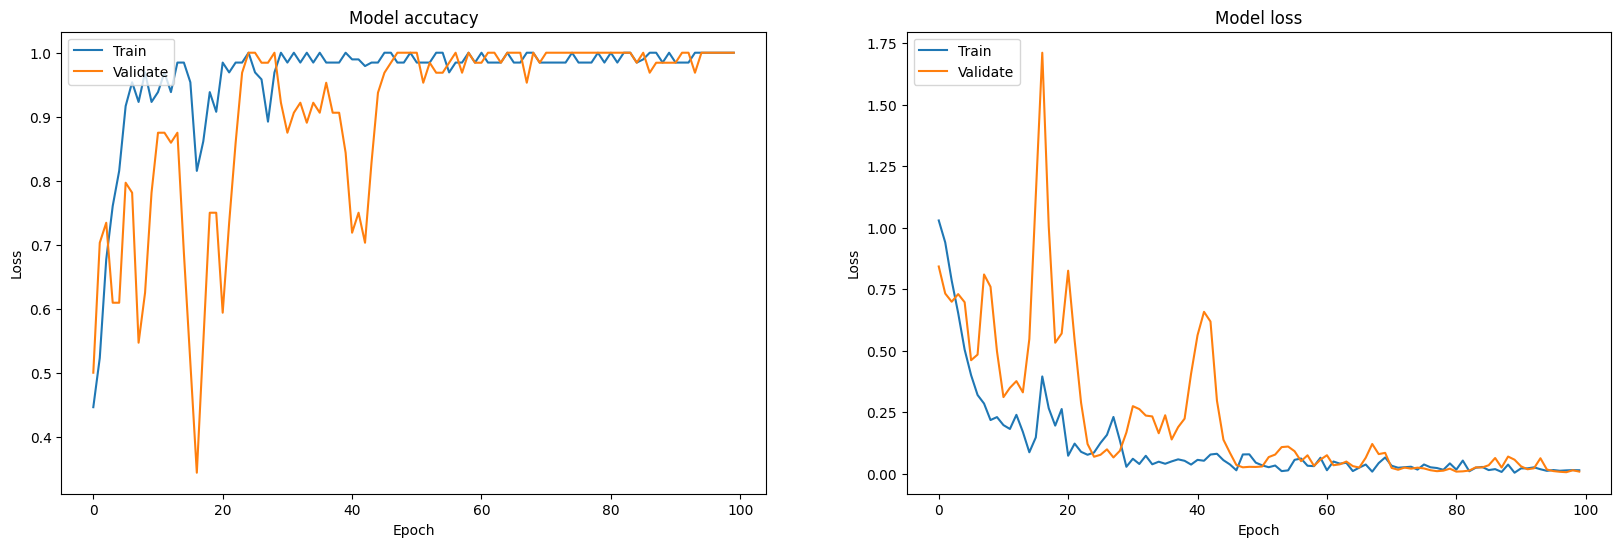

In [58]:
#Load base model
base_model=MobileNet(weights='imagenet',include_top=False, input_shape=(224, 224, 3))

# Add new layers
x=base_model.output
x1 = GlobalAveragePooling2D()(x)
x2 = Dense(1024,activation='relu')(x1)
x3 = Dense(1024,activation='relu')(x2)
x4 = Dense(512,activation='relu')(x3)
pred = Dense(3,activation='Softmax')(x4)
model=Model(inputs=base_model.input,outputs=pred)
#model.summary()
for layer in model.layers[:0]:
  layer.trainable=False #Freeze base model
for layer in model.layers[0:]:
  layer.trainable=True #Freeze base model

# for i,layer in enumerate(base_model.layers):
#   print(i,layer.name)

#Create DataGeneartor Object
datagen=ImageDataGenerator( rotation_range=20,
                                              zoom_range=0.2,
                                              width_shift_range=0.2,
                                              height_shift_range=0.2,
                                              shear_range=0.2,
                                              horizontal_flip=True,
                                              preprocessing_function=preprocess_input,
                                              fill_mode="nearest")

# Create Train Image generator
train_generator=datagen.flow_from_directory('/content/Ship/Train',
                                                                  target_size=(224,224),
                                                                  color_mode='rgb',
                                                                  batch_size = 32,
                                                                  class_mode='categorical',
                                                                  seed = 42,
                                                                  shuffle=True)

# Create Validation Image generator
val_generator=datagen.flow_from_directory('/content/Ship/Validate',
                                                                target_size=(224,224),
                                                                color_mode='rgb',
                                                                batch_size=32,
                                                                class_mode='categorical',
                                                                seed = 42,
                                                                shuffle=True)

plt.figure(figsize=(15, 15))

batch = train_generator.next()
batch_size = batch[0].shape[0]
# for i in range(0,batch_size):
#   Img_trian = (batch[0][i]+1)/2 #rescale
#   plt.subplot(6, 6, i+1)
#   plt.imshow(Img_trian)
# plt.figure(figsize=(15, 15))
# batch = val_generator.next()
# batch_size = batch[0].shape[0]
# for i in range(0,batch_size):
#   Img_val = (batch[0][i]+1)/2 #rescale
#   plt.subplot(6, 6, i+1)
#   plt.imshow(Img_val)

# Create Optimizer
opts = Adam(learning_rate = 0.0001, use_ema=True)
model.compile(loss='categorical_crossentropy',optimizer=opts,metrics=['accuracy'])

# Define training Generator Parameter
EP = 100
step_size_train=train_generator.n//train_generator.batch_size
step_size_val = val_generator.n//val_generator.batch_size
# check step_size_Train = step_size_val -> if not, adjust batch_size to make it equal

history=model.fit_generator(generator=train_generator,
                                        steps_per_epoch=step_size_train,
                                        validation_data = val_generator,
                                        validation_steps = step_size_val,
                                        epochs=EP,
                                        verbose = 1)

# Performance Visualization
# View Accuracy (Training, Validation)
plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"], label="Train_acc")
plt.plot(history.history["val_accuracy"], label="Validate_acc")
plt.title('Model accutacy')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validate'], loc='upper left')

# View Loss (Training, Validation)
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label="Train_loss")
plt.plot(history.history['val_loss'], label="Validate_loss")
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validate'], loc='upper left')


# Initial test generator
Test_generator = datagen.flow_from_directory(
    '/content/Ship/Test',
    class_mode="categorical",
    target_size=(224, 224), color_mode="rgb",
    shuffle=False,
    batch_size=1)

#Get class id for y_real_class
y_true = Test_generator.classes
#predict images according to test_generator # number of real class
preds = model.predict_generator(Test_generator)
print(preds.shape)
print(preds)
y_pred = np.argmax(preds,axis=1)
print(Test_generator.classes)
print(y_pred)
#Calculate confusion matrix, classification report between y_true and df_class
print(confusion_matrix(y_true, y_pred))
print(classification_report(y_true, y_pred))